# Exercise 1 - Discrete random variable
The probability distribution function of a discrete variable k is given by the following:
$$p(k) = \begin{cases}k/15 \quad k=1,2,3,4,5 \\ 0 \quad otherwise\end{cases}$$

### 1.1) write the R probability functions for the probability density and cumulative distribution functions,following the R naming convention

In [9]:
#Probability density
dprob <- function(k){ifelse(k==1|k==2|k==3|k==4|k==5,k/15,0)}

In [24]:
x <- 0:10
sum(dprob(x))

[1] 1

In [33]:
#Cumulative
pprob <- function(x){ifelse(x==1|x==2|x==3|x==4|x==5,sum(dprob(0:x)),0)}

In [38]:
pprob(5)

[1] 1

### 1.2) produce two plots showing the pdf and cdf, separately

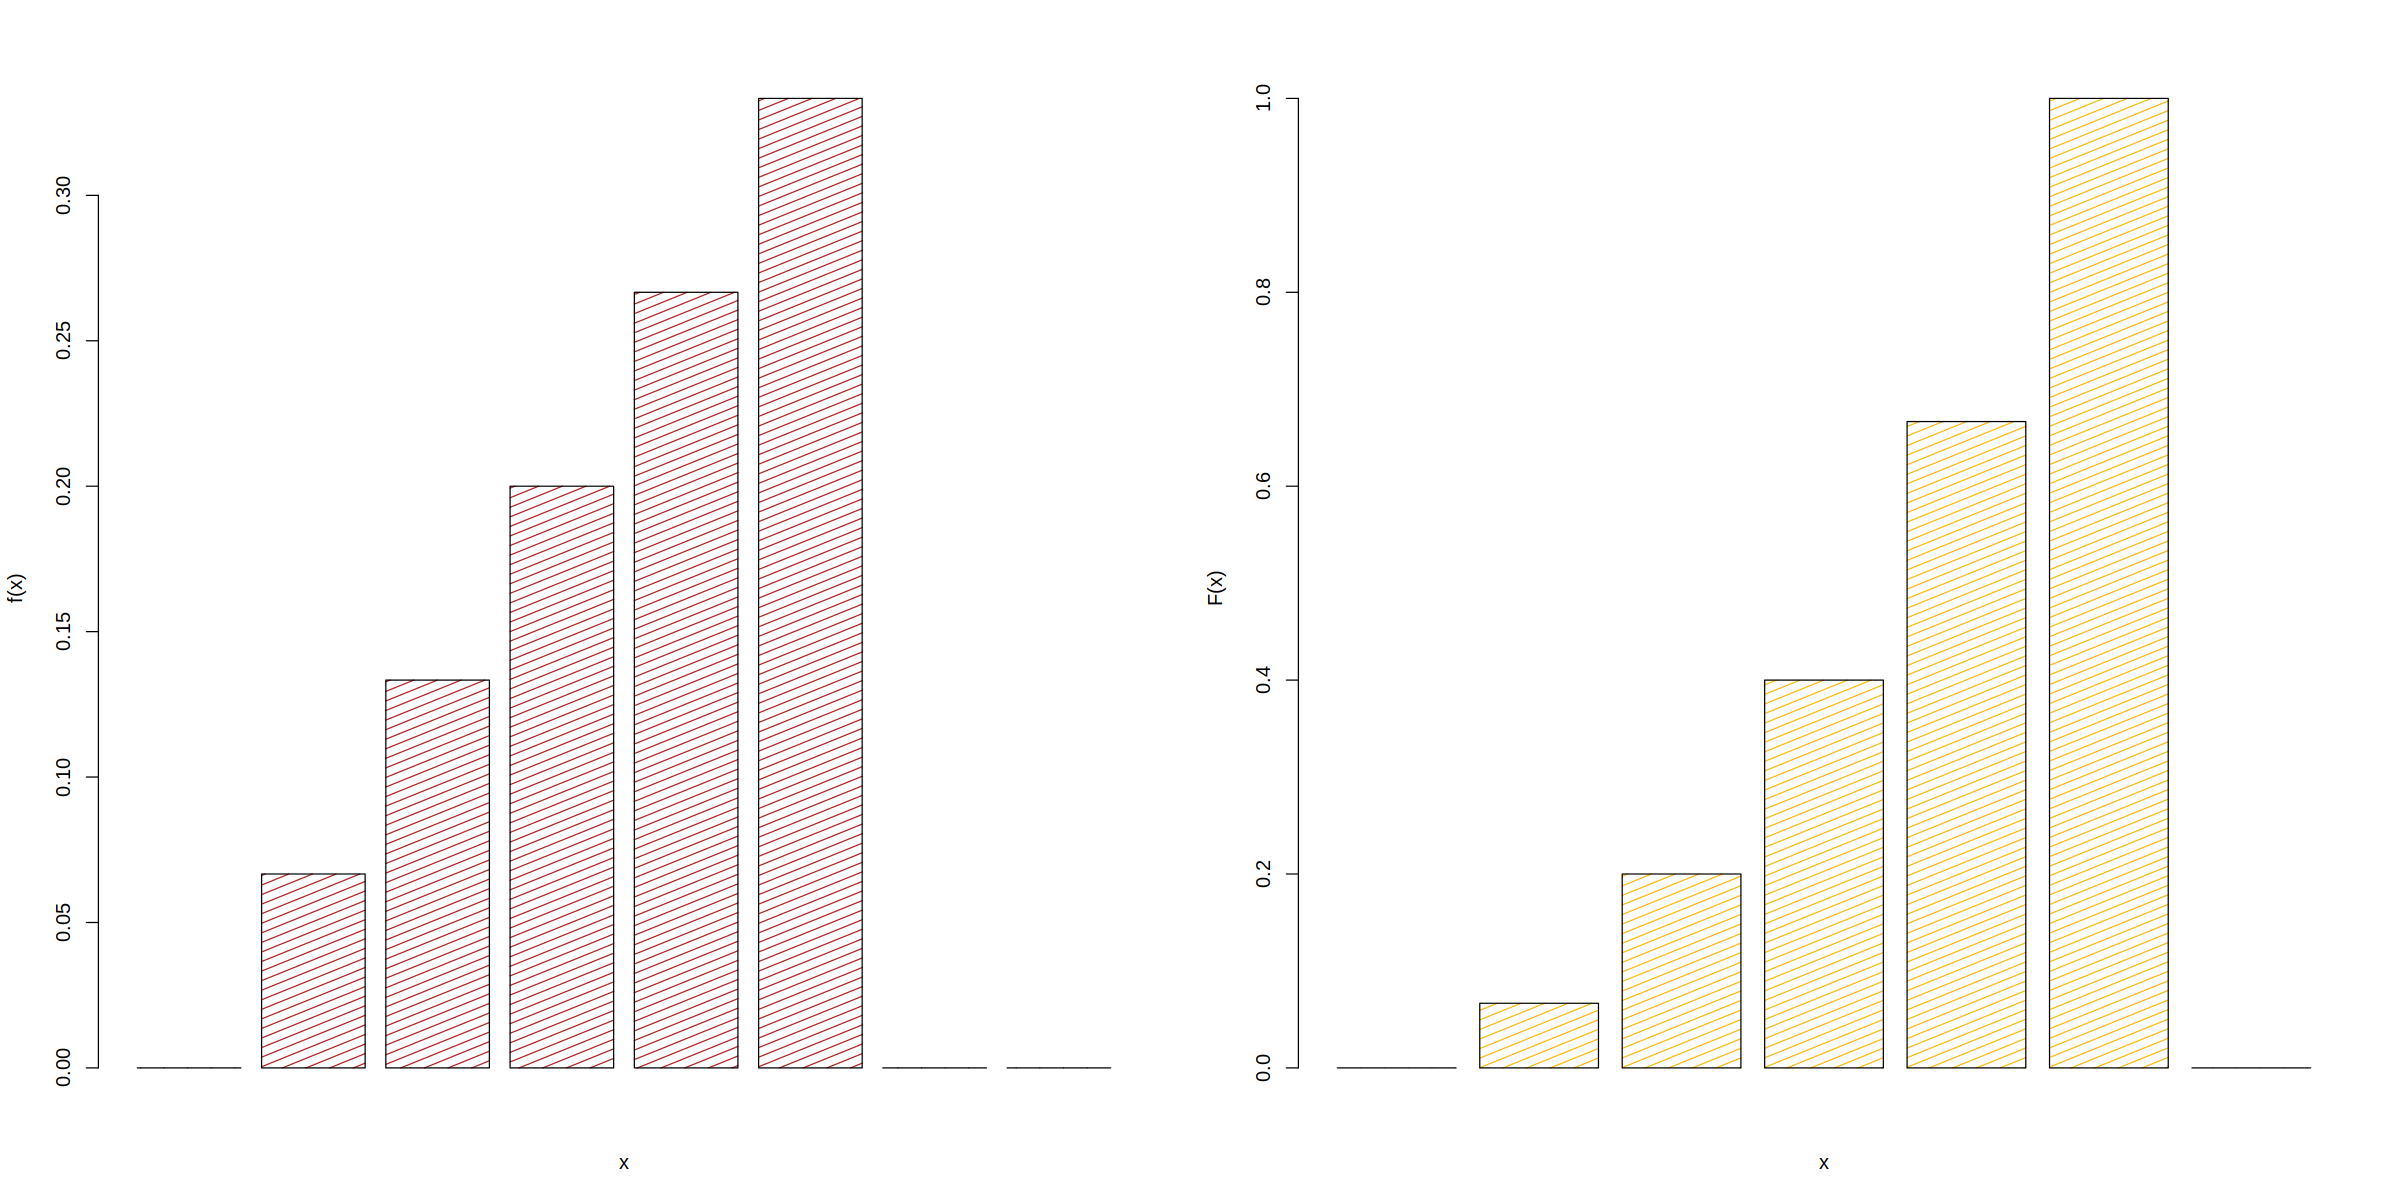

In [47]:
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,2))

x <- 0:7
pdf <- dprob(x)

for(i in x){
    cdf[i] <- pprob(x[i])
}


barplot(pdf, density=30, col='firebrick', xlab='x', ylab='f(x)')
barplot(cdf, density=30, col='darkgoldenrod1', xlab='x', ylab='F(x)')

### 1.3) compute, using R, the mean value and variance of the probability distribution

In [48]:
#expected value
mean <- sum(x*pdf)

#variance
var <- sum((x**2)*pdf)-(mean**2)

In [52]:
cat('Expected value:', mean, '\nVariance:',var)

Expected value: 3.666667 
Variance: 1.555556

### 1.4) compute, using R, the expected value E [k (6 − k)]

In [53]:
y <- x*(6-x)

expected <- sum(y*pdf)

In [54]:
cat('Expected value:', expected)

Expected value: 7

### 1.5) write the R function that allows to sample random numbers from the probability distribution

In [55]:
rprob <- function(n) {
    xp <- c()
    x <-seq(0,5)
    for (i in seq(1,n)) {
    u<-runif(1)
    #cat('u:',u, ' ')
    if (u<=cdf[2] & u>=cdf[1]) {xp[i]<-x[2]}
    else if (u<=cdf[3] & u>=cdf[2]) {xp[i]<-x[3]}
    else if (u<=cdf[4] & u>=cdf[3]) {xp[i]<-x[4]}
    else if (u<=cdf[5] & u>=cdf[4]) {xp[i]<-x[5]}
    else if (u<=cdf[6] & u>=cdf[5]) {xp[i]<-x[6]}
    else {xp[i]<-0}
        }
    xp
    }

In [58]:
rprob(20)

[1] 5 2 5 2 4 4 4 4 4 5 5 4 5 5 3 5 4 2 3 4

### 1.6) using the implemented function (point (5)), sample $10^5$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

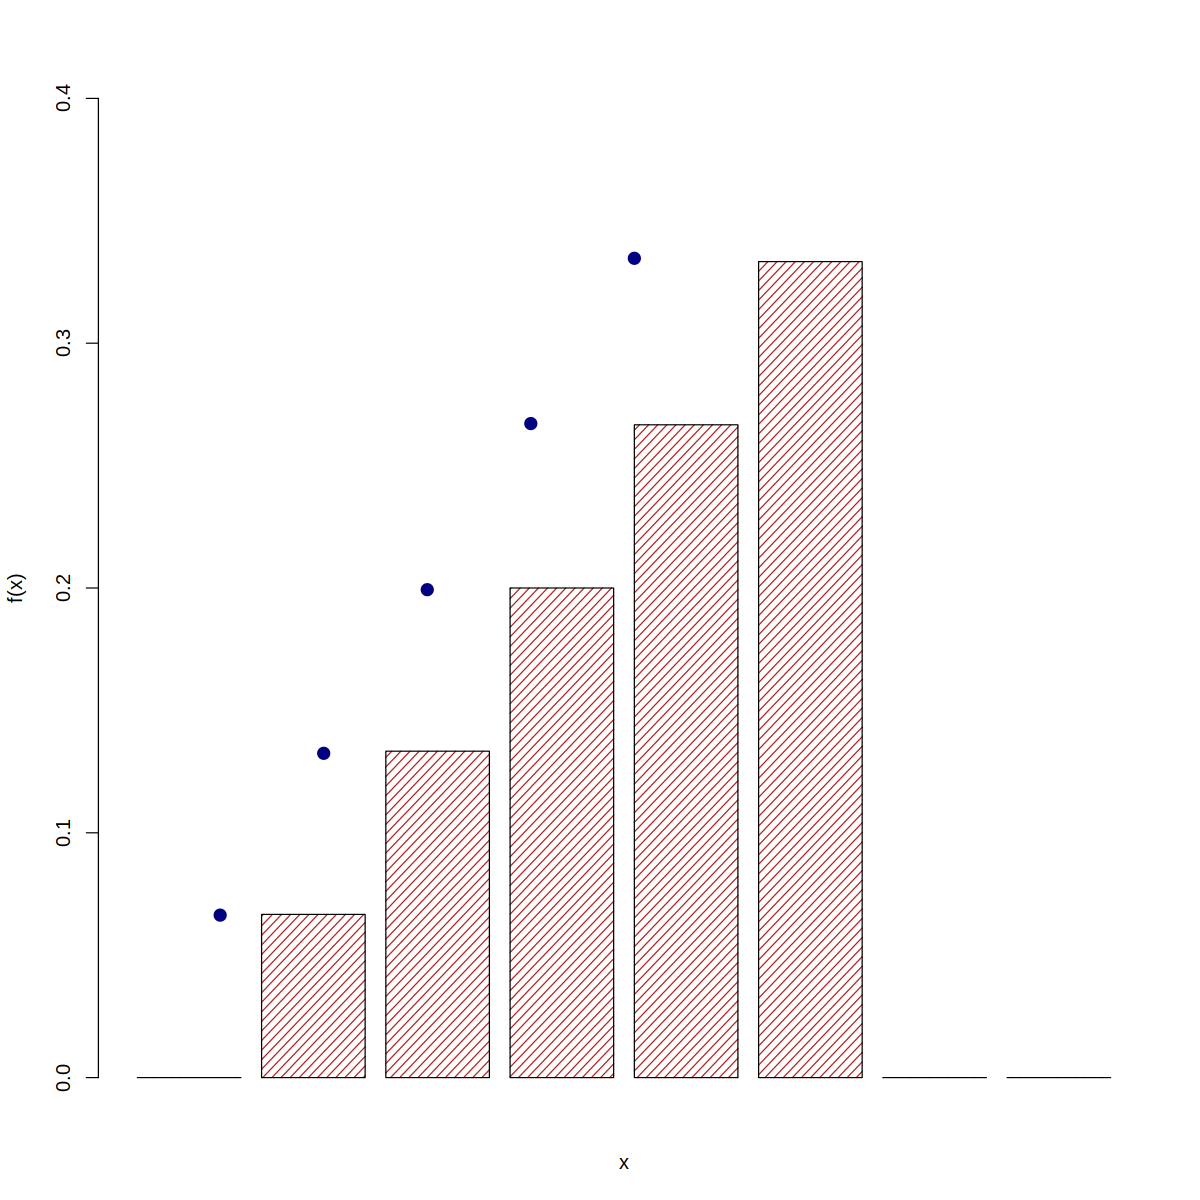

In [68]:
rd <- rprob(10^5)
sample <- table(rd)/(10^5) #normalizing
x <- 1:5


options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,1))

barplot(pdf, density=30, col='firebrick', xlab='x', ylab='f(x)', ylim=c(0,0.4))
points(x,sample, pch=20,cex=2, col='navy')

# Exercise 2 - Continuous random variable
The triangular distribution, in the interval (a, b), is given by the following: $$f(x)=\begin{cases}\dfrac{2(x-a)}{(b-a)(c-a)}\quad a\leq x <c \\\\
\dfrac{2(b-x)}{(b-a)(b-c)} \quad c\leq x \leq b \\\\ 0 \quad otherwise \end{cases}$$
where $c\in[a, b]$.

### 2.1) plot the function, given the interval (a, b)

In [16]:
dtriang <- function(a,b,c){
    y <- c()
    x <- seq(a,b, by=.1)
    len <- seq(1,length(x),1)
    for(i in len){
        if(a<=x[i] & x[i]<c){y[i] <- 2*(x[i]-a)/((b-a)*(c-a))}
        else if(c<= x[i] & x[i]<=b){y[i] <- 2*(b-x[i])/((b-a)*(b-c))}
            else{y[i]<-0}
            }
    y
}

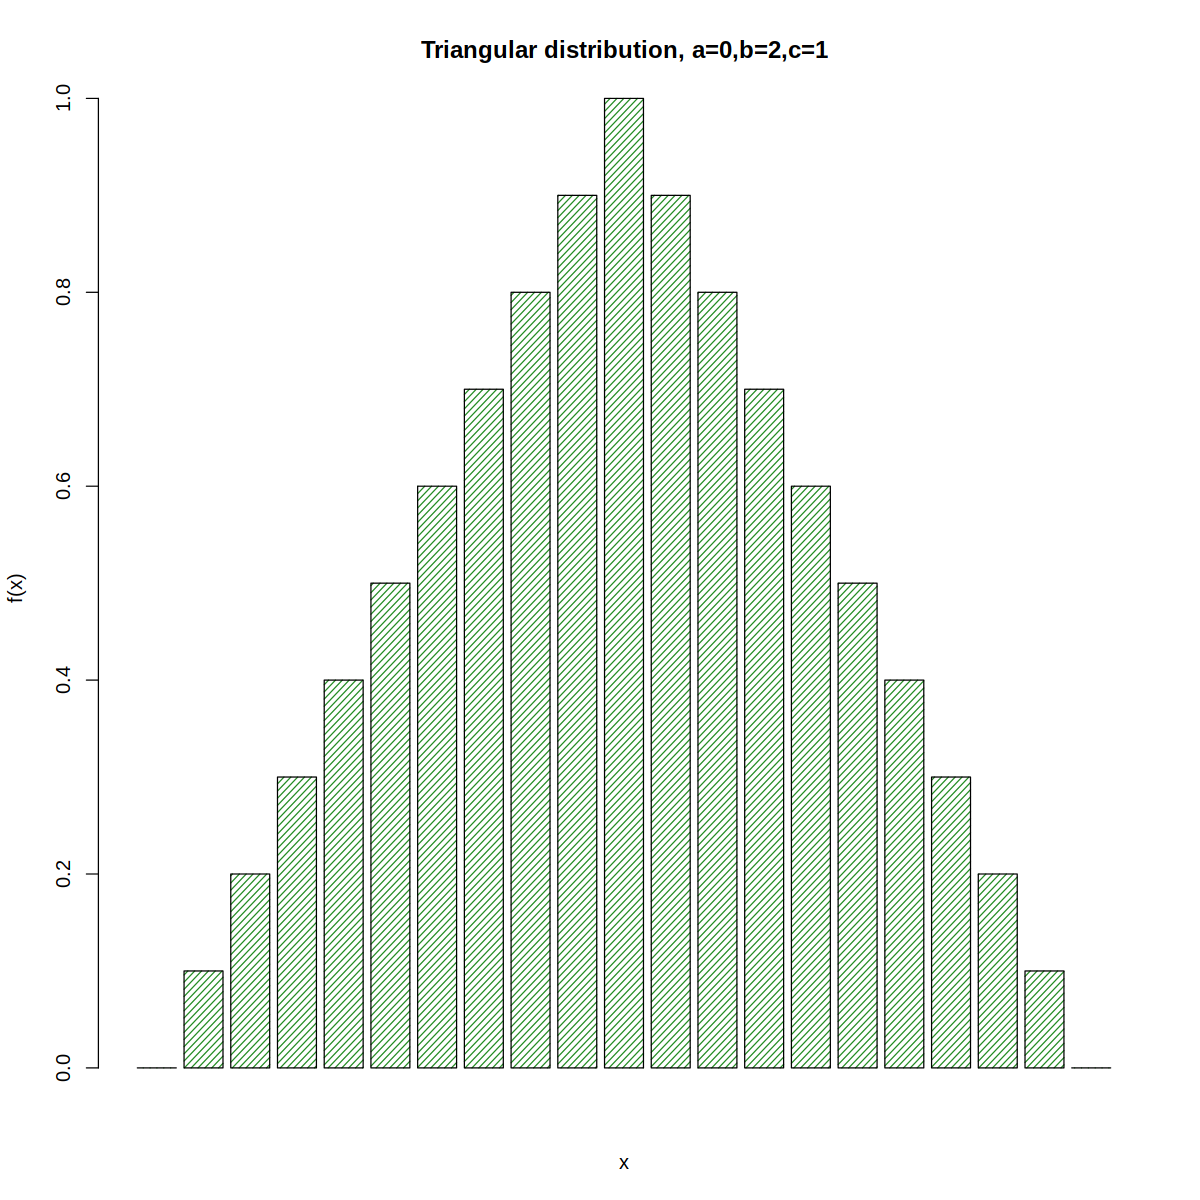

In [17]:
a <- 0
b <- 2
c <- 1
x <- seq(a,b, by=.1)

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,1))

barplot(dtriang(a,b,c), density=40, col='forestgreen', main='Triangular distribution, a=0,b=2,c=1', xlab='x',
    ylab='f(x)')


### 2.2) and write an algorithm to generate random numbers from the triangular distribution

In [21]:
#since itś continuous, I can define the pdf by integral and not sum
ptriang <- function(a,b,c){
    y <- c()
    x <- seq(a,b, by=.1)
    len <- seq(1,length(x),1)
    for (i in len){
        if (a<=x[i] & x[i]<c){
            y[i]<-(x[i]^2-2*a*x[i])/((b-a)*(c-a))}
        else if (c<=x[i] & x[i]<=b){
            y[i]<-(2*b*x[i]-x[i]^2)/((b-a)*(b-c))-1}
        else {y[i]<-0}
        }
    y
    }

In [27]:
ptriang(a,b,c)

[1] 0.000 0.005 0.020 0.045 0.080 0.125 0.180 0.245 0.320 0.405 0.500 0.595
[13] 0.680 0.755 0.820 0.875 0.920 0.955 0.980 0.995 1.000

In [32]:
rtriang <- function(n,a,b,c){
    x <- seq(a,b,by=.1)
    pf <- ptriang(a,b,c)
    sample <- c()
    for(i in 0:n){
        r <- runif(1)
        index <- which(abs(pf - r) == min(abs(pf - r))) #finding the index of the closest cdf value
        sample[i] <- x[index]
    }
    sample
}


In [33]:
a <- 0
b <- 2
c <- 1

rtriang(10,a,b,c)

[1] 0.9 1.1 0.7 1.3 0.8 1.1 0.5 0.4 1.2 0.7

### 2.3) generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

In [34]:
sample <- rtriang(10^4,a,b,c)

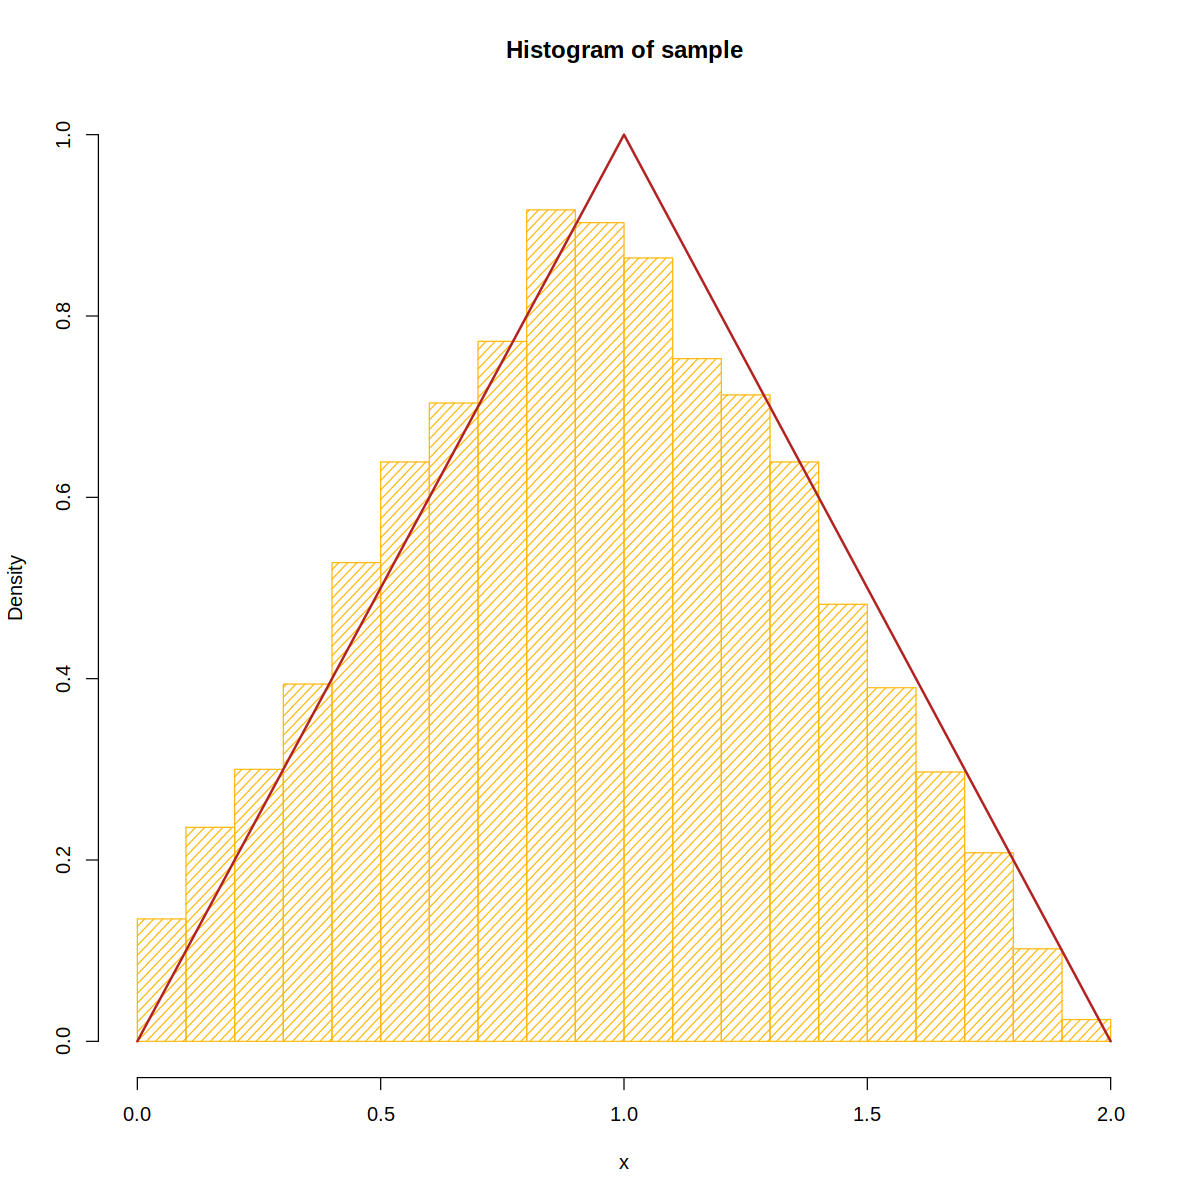

In [38]:
hist(sample,freq=FALSE, xlab='x', density=30, col='darkgoldenrod1',ylim=c(0,1))
lines(x, dtriang(a,b,c), lwd=2, lty=1, col='firebrick')

# Exercise 3
The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30

### 3.1) simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

In [39]:
lambda <- 1/30
x <- seq(0,80,by=1)
sample <- rexp(60, lambda)

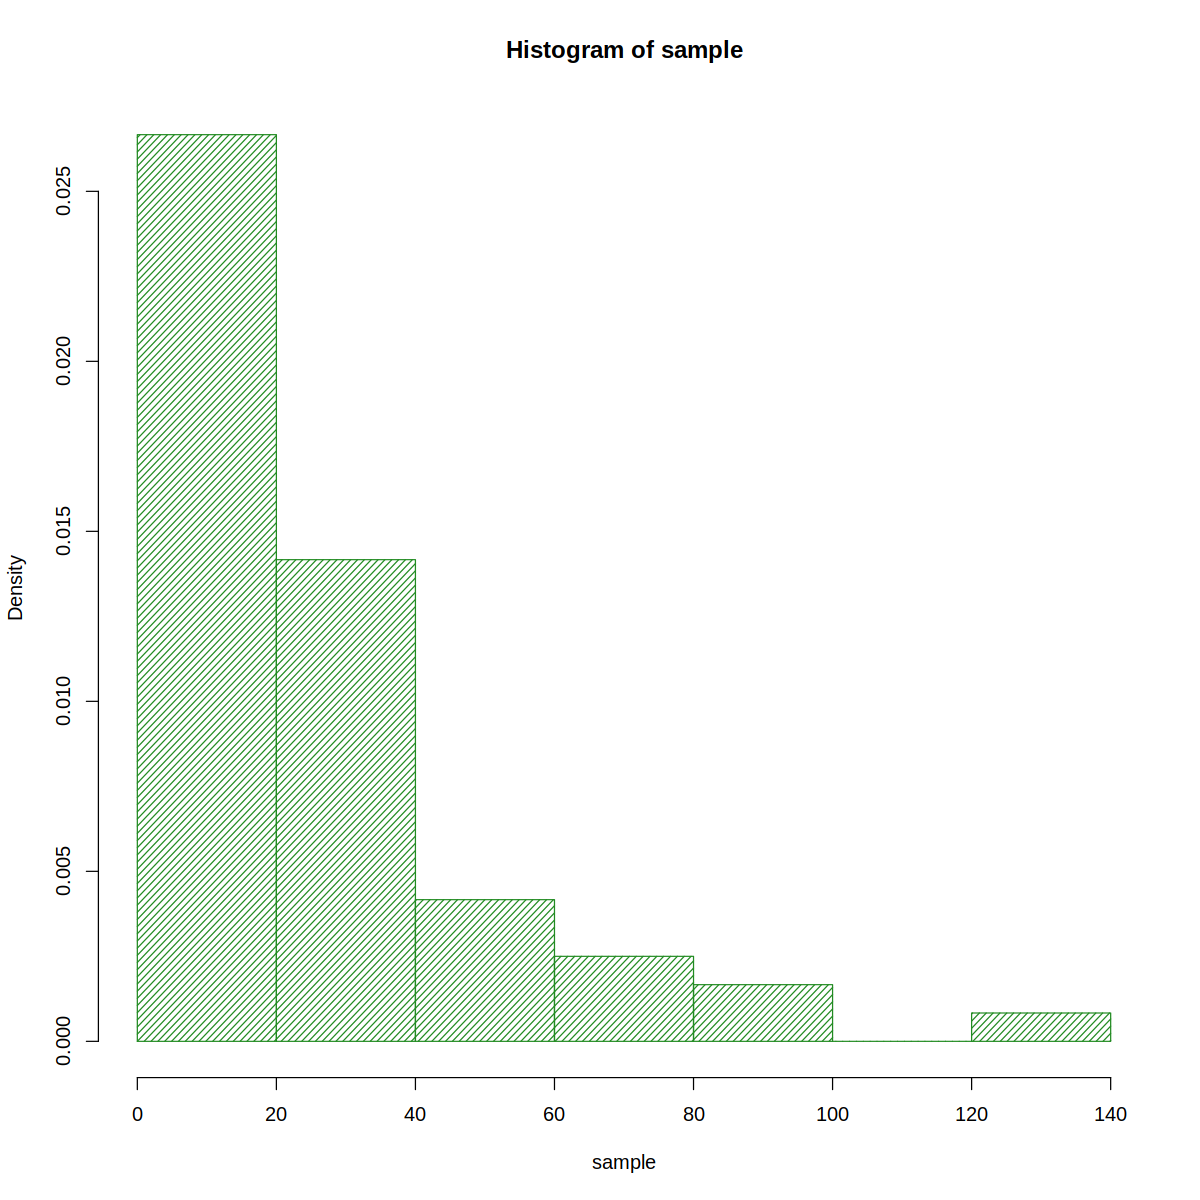

In [43]:
hist(sample, freq=FALSE, col='forestgreen', density=40)

### 3.2) what is the probability that a person will wait for less than 12 minutes ?

In [50]:
pexp(x[13],lambda)

[1] 0.32968

### 3.3) evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [54]:
#From the simulated data:
sim_avg <- mean(sample)
sim_avg

[1] 25.89699

In [55]:
#Expected value from theory:
th_avg <- 1/lambda
th_avg

[1] 30

In [56]:
#integrating
int_avg <- integrate(function (x) {x * dexp(x,rate=1/30,log=F)},lower=0, upper =10^5)
int_avg

30 with absolute error < 2.8e-08

### 3.4) what is the probability for waiting more than one hour before being received 

In [57]:
1-pexp(x[61], lambda)

[1] 0.1353353

# Exercise 4 - Multiple choices exams
The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternatives    

a student either knows the answer, or selects randomly the answer among the five possible choices

### 4.1) assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given, what it the probability that the student really knew the correct answer ? write a small R program to provide the answer

In [58]:
# This is a problem of conditional probability, where we can use Bayes theorem
# C = correct answer, W = wrong answer, K = student knows the answer, R = student selects randomly
# p(K|C)= (p(C|K)p(K))/p(C)

p.K <- 0.7
p.R <- 1-p.K
p.CK <- 1    #p(C|K) probability that the answer is correct if the student knows the answer
p.CR <- 1/5  #p(C|R) probability that the answer is correct if the student selects randomly


p.C <- p.CK*p.K+p.CR*p.R
p.KC <- (p.CK*p.K)/p.C
p.KC


[1] 0.9210526

# Exercise 5 - Waiting time
• starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma
Termini. We assume there is always an available seat on a train leaving from Milano
• assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability
that she has to wait
### 5.1) at most 10 minutes

In [65]:
#P(X<=10)= 1-P(X>=10)
lambda <- 1/30
x <- seq(1,500,by=1)


pexp(x,lambda)[10]


[1] 0.2834687

### 5.2) at least 15 minutes

In [66]:
1-pexp(x,lambda)[15]

[1] 0.6065307

### 5.3) what is the average time spent waiting ?

In [69]:
e.x <- integrate(function (x) {x * dexp(x,rate=1/30,log=F)},lower=0, upper =10^5)

In [70]:
e.x

30 with absolute error < 2.8e-08

# Exercise 6 - stock investment
- the annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation
- Mr X decides to buy 200 share of that specific stock at a price of 85e per share
### what is the probability that after a year his net profit from the investment is at least 800e ?
• (suppose there are no transaction costs and that there are no annual dividend for the stock

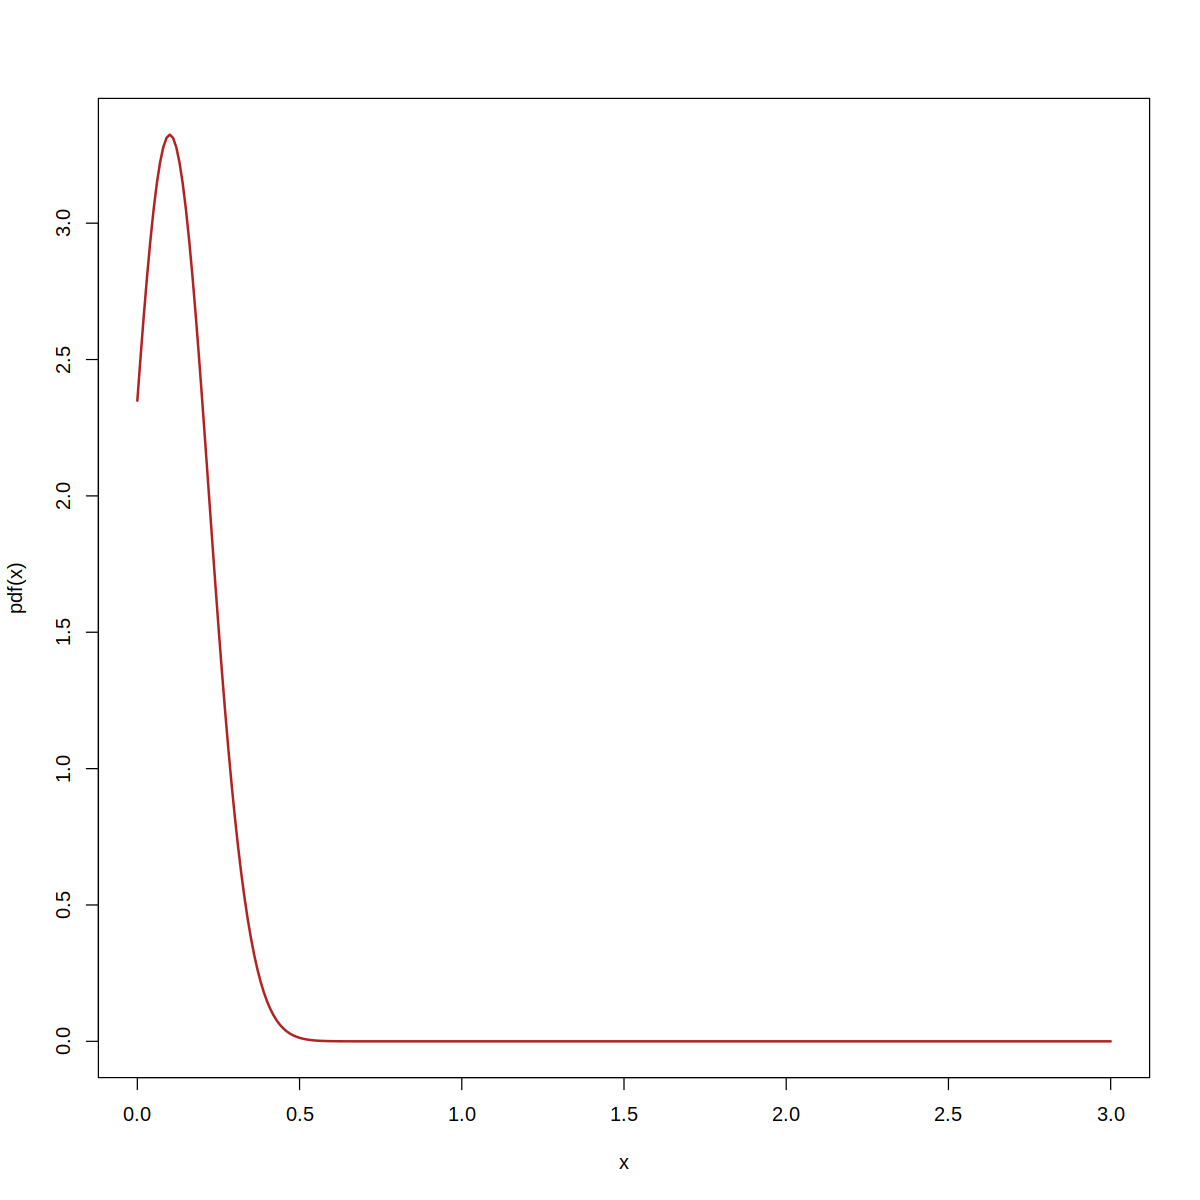

In [71]:
x <- seq(0,3,.01)
plot(x,dnorm(x,0.1,0.12),col='firebrick', xlab='x',ylab='pdf(x)',lwd=2,type='l')

In [72]:
#percentage of profit 
r <- 800/(200*85)
r

[1] 0.04705882

In [73]:
p_800 <- 1-pnorm(r,0.1,0.12)
p_800

[1] 0.6704574